In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Load tide data from a CSV file
with open('data.txt', 'r') as infile:
    tide_data = infile.read().split('\n')
    
day = []
time = []
height = []

def timeToSeconds(time):
    time = time.split(':')
    return int(time[0]) * 3600 + int(time[1]) * 60 

for line in tide_data[3:]:
    line = line.lstrip(" ")
    lineData = line.split(" ")
    lineData = [x for x in lineData if x != '']
    #print(lineData)
    day.append(int(lineData[0]))
    time.append(timeToSeconds(lineData[1]))
    height.append(float(lineData[2]))

a_fit: -0.24694933324516913
b_fit: 1.1276946466383349
c_fit: -3.1497843444807403
d_fit: 2.4748223633930455
------------------
Fit_y: [2.7113347  2.55035755 2.2281851  2.3452514  2.71727091 2.65090944
 2.25063307 2.4975995  2.66774153 2.51151257 2.32436941 2.38079413
 2.3130904  2.35738626 2.67680533 2.53689787 2.45716326 2.47171001
 2.55087601 2.23340214 2.60873672 2.72166437 2.39441462 2.23688409
 2.70654968 2.67649142 2.26216098 2.24492012 2.51205119 2.55035755
 2.64039987 2.60919409 2.35786576 2.22934517 2.71727091 2.39389975
 2.28515053 2.70673741 2.47225472 2.26243842 2.66774153 2.51151257
 2.32436941 2.64080363 2.57357847 2.22821308 2.23703048 2.62073168
 2.68978048 2.25063307 2.24472179 2.41826053 2.71968662 2.72166437
 2.39441462 2.23688409 2.49705702 2.69004811 2.51205119 2.2947998
 2.38029064 2.60919409 2.62117083 2.22934517 2.28515053 2.70673741
 2.69680994 2.26243842 2.23340214 2.51151257 2.32480176 2.64080363
 2.72164771 2.35738626 2.23703048 2.71727091 2.68978048 2.696809

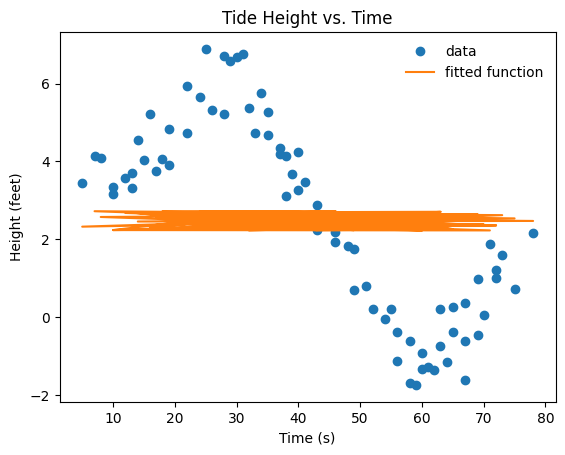

In [5]:
x = np.array([x // 1000 for x in time])
# print(x)
y = np.array(height)
y_err = np.sum(y) / len(y) * 0.25

# Define the oscillatory function
def func(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

# Fit the oscillatory function to the tide data
params, params_cov = curve_fit(func, x, y)

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]

print("a_fit: " + str(a_fit))
print("b_fit: " + str(b_fit))
print("c_fit: " + str(c_fit))
print("d_fit: " + str(d_fit))

print("------------------")

# fit_y = func(x, a_fit, b_fit, c_fit, d_fit)
fit_y = a_fit * np.sin(b_fit * x + c_fit) + d_fit

print("Fit_y: " + str(fit_y))
# Plot the tide data and the fitted function

plt.plot(x, y, "o", label="data")
plt.plot(x, fit_y, label="fitted function")
plt.xlabel("Time (s)")
plt.ylabel("Height (feet)")
plt.title("Tide Height vs. Time")
plt.legend(frameon=False)
plt.show()